In [2]:
from google.colab import files
import zipfile

# Upload file ZIP
uploaded = files.upload()

# Ekstrak file ZIP
with zipfile.ZipFile("student_dataset original.zip", "r") as zip_ref:
    zip_ref.extractall("data")
    import os
os.listdir("data")

Saving student_dataset original.zip to student_dataset original.zip


['Students Performance Dataset.json',
 'Students_Grading_Dataset_Biased.json',
 'Students_Grading_Dataset_Biased.csv',
 'Students Performance Dataset.csv',
 'metadata.xlsx']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib

file_path = "data/Students Performance Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [4]:
# Buat kolom class untuk kategori kelulusan
# Kelas 'Pass' jika Total_Score ≥ 70, 'Fail' jika < 70
df['Class'] = df['Total_Score'].apply(lambda x: 'Pass' if x >= 70 else 'Fail')

In [5]:
print(df['Total_Score'].isnull().sum())
print(df['Class'].isnull().sum())

0
0


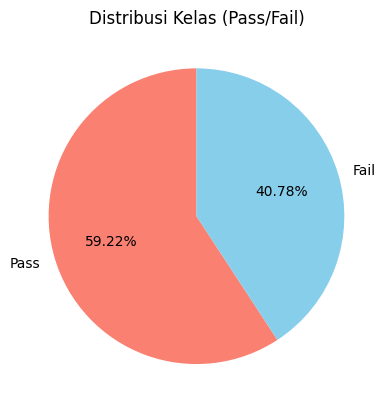

In [6]:
# Pie Chart Distribusi Pass/Fail
df["Class"].value_counts().plot.pie(
    autopct='%1.2f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title("Distribusi Kelas (Pass/Fail)")
plt.ylabel("")
plt.show()

In [7]:
# Cek Missing Values
print("Missing Values per Kolom:")
print(df.isnull().sum())

Missing Values per Kolom:
Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
Class                            0
dtype: int64


In [8]:
# Parent_Education_Level tidak akan digunakan jadi di drop saja
df = df.dropna()
print(df.isnull().sum())

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
Class                         0
dtype: int64


In [27]:
# Cek dan hapus data duplikat
print("\nJumlah baris duplikat:", df.duplicated().sum())
print("\nTidak ada data duplikat")


Jumlah baris duplikat: 0

Tidak ada data duplikat



Kolom: Attendance (%)
Jumlah outlier: 0
→ Tidak ada outlier.


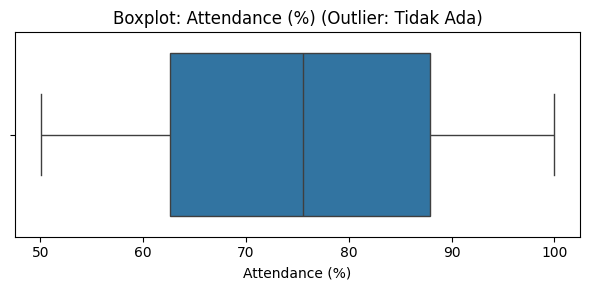


Kolom: Midterm_Score
Jumlah outlier: 0
→ Tidak ada outlier.


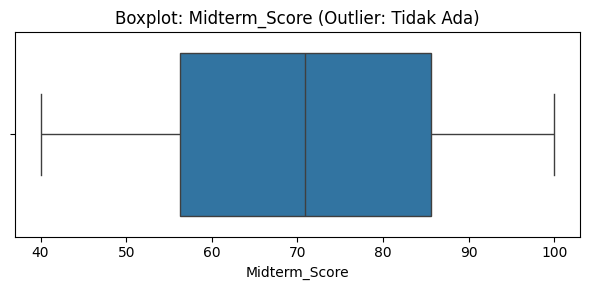


Kolom: Final_Score
Jumlah outlier: 0
→ Tidak ada outlier.


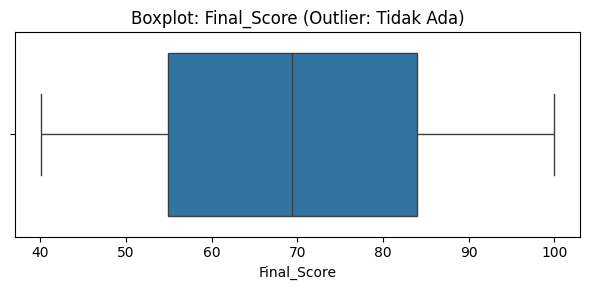


Kolom: Projects_Score
Jumlah outlier: 0
→ Tidak ada outlier.


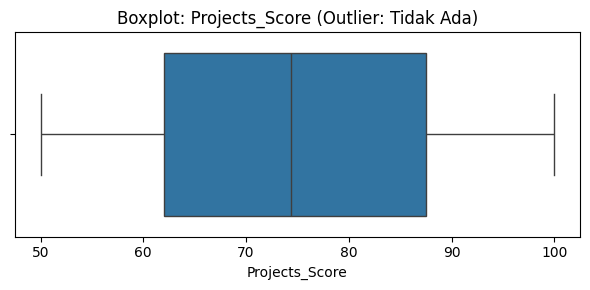


Kolom: Assignments_Avg
Jumlah outlier: 0
→ Tidak ada outlier.


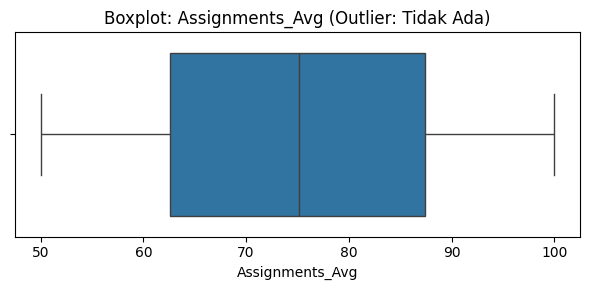


Kolom: Quizzes_Avg
Jumlah outlier: 0
→ Tidak ada outlier.


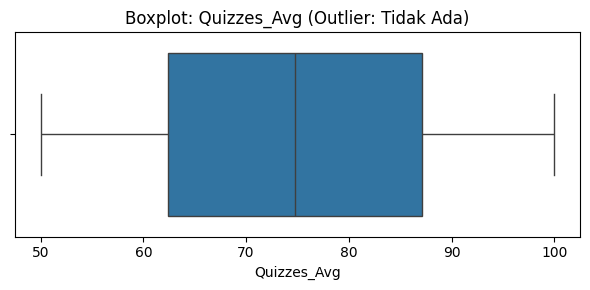


Kolom: Participation_Score
Jumlah outlier: 0
→ Tidak ada outlier.


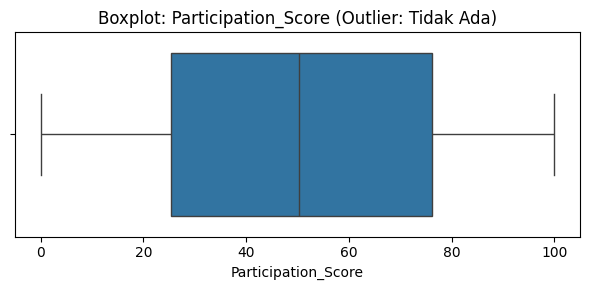


Kolom: Total_Score
Jumlah outlier: 4
→ Ada outlier.


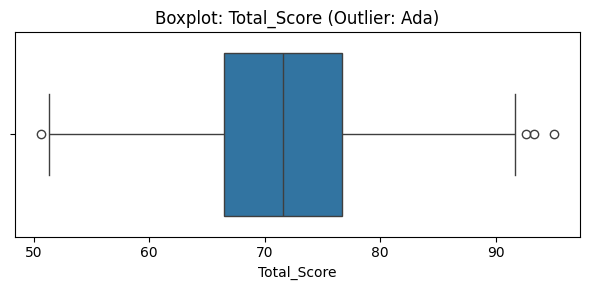


Kolom: Study_Hours_per_Week
Jumlah outlier: 0
→ Tidak ada outlier.


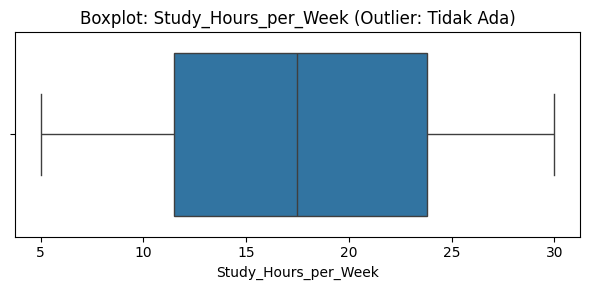


Kolom: Sleep_Hours_per_Night
Jumlah outlier: 0
→ Tidak ada outlier.


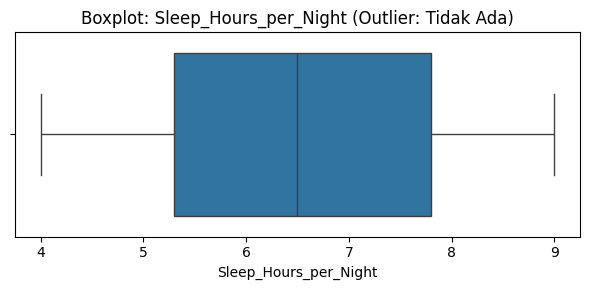


Kolom: Stress_Level (1-10)
Jumlah outlier: 0
→ Tidak ada outlier.


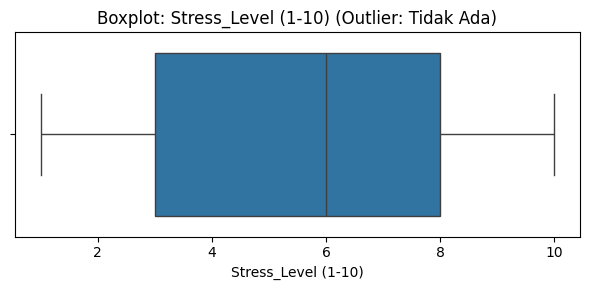

In [10]:
# Deteksi dan visualisasi outlier menggunakan boxplot
from scipy.stats import iqr

outlier_cols = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Projects_Score',
                'Assignments_Avg','Quizzes_Avg', 'Participation_Score', 'Total_Score',
                'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Stress_Level (1-10)']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nKolom: {col}")
    print(f"Jumlah outlier: {len(outliers)}")
    if len(outliers) > 0:
        print("→ Ada outlier.")
    else:
        print("→ Tidak ada outlier.")

    # Visualisasi
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col} (Outlier: {'Ada' if len(outliers) > 0 else 'Tidak Ada'})")
    plt.tight_layout()
    plt.show()

In [12]:
# Total_Score adalah hasil gabungan dari fitur-fitur lainnya (Midterm, Final, Quiz, Assignment, dsb).
# Jika digunakan, model akan "curang" karena belajar dari skor akhir yang secara langsung menentukan kelulusan.
# Ini akan menyebabkan overfitting dan model tidak belajar dari hubungan yang sebenarnya antar fitur-fitur penilaian.

# Pilih fitur untuk modelling
selected_features = [
    'Projects_Score', 'Final_Score', 'Midterm_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Class'
]

df = df[selected_features]

In [13]:
# Encode target Class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])  # Pass = 1, Fail = 0
df.head()

,Projects_Score,Final_Score,Midterm_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Class
0,62.84,59.61,40.61,73.69,53.17,73.4,0
1,98.23,74.00,57.27,74.23,98.23,88.0,1
2,91.22,63.85,41.84,85.85,50.00,4.7,0
3,55.48,44.44,45.65,68.10,66.27,4.2,0
4,87.43,61.77,53.13,67.66,83.98,64.3,1


In [14]:
# Pisahkan fitur dan target
X = df.drop(columns='Class')
y = df['Class']

# Reset index agar sinkron saat digabungkan kembali
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Gabungkan kembali
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Class'] = y

print(df.head())
print(df_scaled.head())
print("Jumlah NaN setelah scaling:")

   Projects_Score  Final_Score  Midterm_Score  Assignments_Avg  Quizzes_Avg  \
0           62.84        59.61          40.61            73.69        53.17   
1           98.23        74.00          57.27            74.23        98.23   
2           91.22        63.85          41.84            85.85        50.00   
3           55.48        44.44          45.65            68.10        66.27   
4           87.43        61.77          53.13            67.66        83.98   

   Participation_Score  Class  
0                 73.4      0  
1                 88.0      1  
2                  4.7      0  
3                  4.2      0  
4                 64.3      1  
   Projects_Score  Final_Score  Midterm_Score  Assignments_Avg  Quizzes_Avg  \
0          0.2568     0.326830       0.010168         0.473895     0.063413   
1          0.9646     0.566783       0.287881         0.484697     0.964793   
2          0.8244     0.397532       0.030672         0.717143     0.000000   
3          0.1096

In [47]:
print(df['Class'].isnull().sum())
print(df_scaled['Class'].isnull().sum())
print(df_scaled[df_scaled['Class'].isnull()])

0
0
Empty DataFrame
Columns: [Projects_Score, Final_Score, Midterm_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Class]
Index: []


In [48]:
# Simpan CSV
cleaned_filename = "cleaned_data.csv"
df_scaled.to_csv(cleaned_filename, index=False)
joblib.dump(scaler, 'scaler.pkl')

# Download file
files.download(cleaned_filename)
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>